Epoch 0: Loss = 0.502392
Epoch 100: Loss = 0.300401
Epoch 200: Loss = 0.227920
Epoch 300: Loss = 0.197499
Epoch 400: Loss = 0.184792
Epoch 500: Loss = 0.178416
Epoch 600: Loss = 0.174267
Epoch 700: Loss = 0.171007
Epoch 800: Loss = 0.168102
Epoch 900: Loss = 0.165621
Epoch 1000: Loss = 0.163678
Epoch 1100: Loss = 0.162265
Epoch 1200: Loss = 0.161363
Epoch 1300: Loss = 0.160791
Epoch 1400: Loss = 0.160404
Epoch 1500: Loss = 0.160121
Epoch 1600: Loss = 0.159930
Epoch 1700: Loss = 0.159761
Epoch 1800: Loss = 0.159613
Epoch 1900: Loss = 0.159498
Epoch 2000: Loss = 0.159380
Epoch 2100: Loss = 0.159252
Epoch 2200: Loss = 0.159115
Epoch 2300: Loss = 0.158966
Epoch 2400: Loss = 0.158805
Epoch 2500: Loss = 0.158631
Epoch 2600: Loss = 0.158443
Epoch 2700: Loss = 0.158242
Epoch 2800: Loss = 0.158026
Epoch 2900: Loss = 0.157796
Epoch 3000: Loss = 0.157552
Epoch 3100: Loss = 0.157292
Epoch 3200: Loss = 0.157016
Epoch 3300: Loss = 0.156721
Epoch 3400: Loss = 0.156407
Epoch 3500: Loss = 0.156072
Epoc

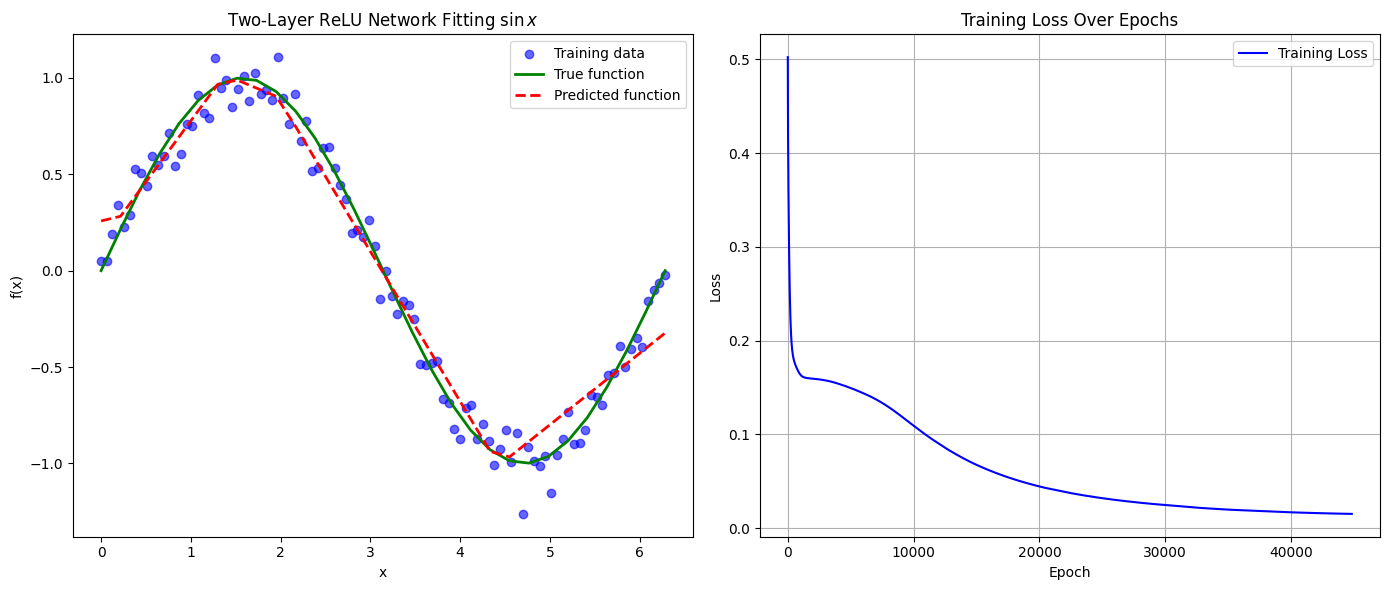

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 ReLU 激活函数
def relu(x):
    return np.maximum(0, x)

# 定义 ReLU 的导数
def relu_derivative(x):
    return (x > 0).astype(float)

# 定义神经网络类
class ReLUNet:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.learning_rate = learning_rate
        # 初始化权重和偏置
        self.W1 = np.random.randn(input_size, hidden_size) * 0.1
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.1
        self.b2 = np.zeros((1, output_size))

    def forward(self, x):
        self.z1 = np.dot(x, self.W1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        return self.z2

    def backward(self, x, y, y_pred):
        # 计算损失对输出的导数
        dL_dz2 = 2 * (y_pred - y) / y.size
        # 反向传播到第二层
        dL_dW2 = np.dot(self.a1.T, dL_dz2)
        dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)
        # 反向传播到第一层
        dL_da1 = np.dot(dL_dz2, self.W2.T)
        dL_dz1 = dL_da1 * relu_derivative(self.z1)
        dL_dW1 = np.dot(x.T, dL_dz1)
        dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)
        # 更新权重和偏置
        self.W2 -= self.learning_rate * dL_dW2
        self.b2 -= self.learning_rate * dL_db2
        self.W1 -= self.learning_rate * dL_dW1
        self.b1 -= self.learning_rate * dL_db1

    def train(self, x, y, epochs, patience=10):
        best_loss = float('inf')
        no_improvement = 0
        loss_history = []  # 用于存储每个 epoch 的损失值
        for epoch in range(epochs):
            y_pred = self.forward(x)
            loss = np.mean((y_pred - y) ** 2)
            self.backward(x, y, y_pred)
            loss_history.append(loss)  # 记录当前 epoch 的损失
            if loss < best_loss:
                best_loss = loss
                no_improvement = 0
            else:
                no_improvement += 1
            if no_improvement >= patience:
                print(f'Early stopping at epoch {epoch}')
                break
            if epoch % 100 == 0:
                print(f'Epoch {epoch}: Loss = {loss:.6f}')
        return loss_history

    def predict(self, x):
        return self.forward(x)

# 定义目标函数
def target_function(x):
    return np.sin(x)

# 生成数据集
np.random.seed(42)
x_train = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y_train = target_function(x_train) + np.random.normal(0, 0.1, size=(100, 1))
x_test = np.linspace(0, 2 * np.pi, 30).reshape(-1, 1)
y_test = target_function(x_test)

# 定义超参数
input_size = 1
hidden_size = 16  # 隐藏层大小
output_size = 1
learning_rate = 0.01
epochs = 100000

# 实例化神经网络
model = ReLUNet(input_size, hidden_size, output_size, learning_rate)

# 训练模型并记录损失
loss_history = model.train(x_train, y_train, epochs)

# 在测试集上进行预测
y_pred = model.predict(x_test)

# 可视化拟合结果
plt.figure(figsize=(14, 6))

# 绘制拟合结果
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, label='Training data', color='blue', alpha=0.6)
plt.plot(x_test, y_test, label='True function', color='green', linewidth=2)
plt.plot(x_test, y_pred, label='Predicted function', color='red', linestyle='--', linewidth=2)
plt.title('Two-Layer ReLU Network Fitting $\sin x$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

# 绘制损失函数图像
plt.subplot(1, 2, 2)
plt.plot(loss_history, label='Training Loss', color='blue')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()